In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
#load the data set
titanic = sns.load_dataset('titanic')

In [18]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [20]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


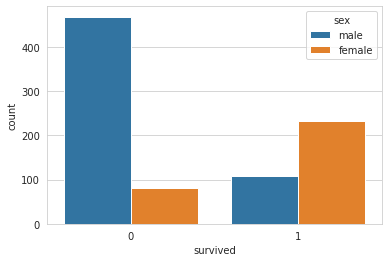

In [21]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived' ,hue='sex', data = titanic)

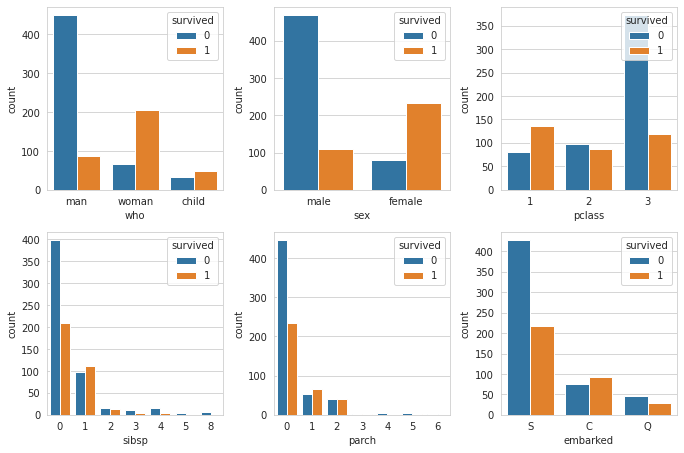

In [22]:
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows,n_cols, figsize = (n_cols*3.2, n_rows*3.2))

for r in range(0,n_rows):
  for c in range(0,n_cols):

    i = r*n_cols + c #index to go through number of columns
    ax= axs[r][c] # show where to position each subplot
    sns.countplot(titanic[cols[i]], hue =titanic['survived'], ax = ax)
    ax.legend(title='survived', loc ='upper right')

plt.tight_layout()

In [23]:
#look at surb=vival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [24]:
#look at survival rate by sex and class
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


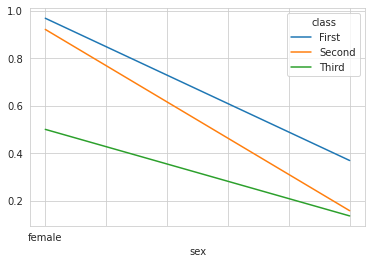

In [25]:
titanic.pivot_table('survived', index = 'sex', columns = 'class').plot()

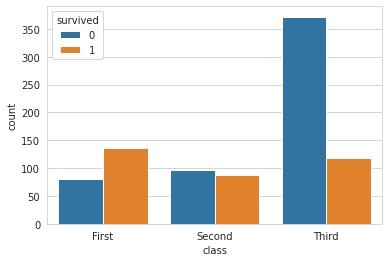

In [30]:
#plot the survival rate of each class
sns.countplot(x='class', hue ='survived', data =titanic)

In [31]:
age = pd.cut(titanic['age'], [0,18,80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

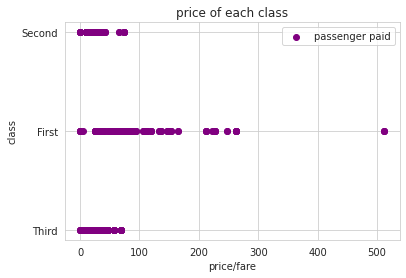

In [32]:
#plot the prices paid of each class
plt.scatter(titanic['fare'], titanic['class'], color = 'purple', label ='passenger paid')
plt.ylabel('class')
plt.xlabel('price/fare')
plt.title('price of each class')
plt.legend()
plt.show()

In [33]:
# count the empty vaue in eaxh column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [48]:
#removing the unwanted columns
titanic = titanic.drop(['alive'], axis = 1)

In [49]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [50]:
# impute average age based on their passenger class
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass ==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [51]:
titanic['age'] = titanic[['age','pclass']].apply(impute_age,axis=1)

In [52]:
titanic.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [53]:
titanic.dropna(inplace = True)

In [54]:
titanic.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [55]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [56]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
#Encode the  sex column

titanic.iloc[:,2] = lbl.fit_transform(titanic.iloc[:,2].values)
#encode the embarked column
titanic.iloc[:,7] = lbl.fit_transform(titanic.iloc[:,7].values)

In [57]:
# print the unique values in the columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [59]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [60]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [61]:
#split the data into independent 'X' and dependent y variables
x = titanic.iloc[:,1:8].values
y = titanic.iloc[:, 0].values

In [62]:
# split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logmodel = LogisticRegression()

In [65]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
prediction = logmodel.predict(x_test)

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.68      0.60      0.64        73

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178



In [76]:
# prediction of me
my_survival = [[1,1,21,0,0,0,3]]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

# print prediction of my survival
prediction = logmodel.predict(my_survival_scaled)
print(prediction)

if prediction == 0:
  print('oh no! you did not make it')
else:
  print('nice, you survived !')

[1]
nice, you survived !
